In [42]:
# Download relevant libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade jedi==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: parso
    Found existing installation: parso 0.7.1
    Uninstalling parso-0.7.1:
      Successfully uninstalled parso-0.7.1
  Attempting uninstall: jedi
    Found existing installation: jedi 0.17.2
    Uninstalling jedi-0.17.2:
      Successfully uninstalled jedi-0.17.2


In [44]:
import os

In [46]:
# Access list of files:
os.listdir(r"/Users/munira/Documents/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [48]:
# Access specific file:
uber_15 = pd.read_csv(r"/Users/munira/Documents/Datasets/uber-raw-data-janjune-15_sample.csv")

In [50]:
uber_15.shape

(100000, 4)

In [52]:
type(uber_15)

pandas.core.frame.DataFrame

In [54]:
# Find number of duplicates
uber_15.duplicated().sum()

54

In [56]:
# Remove duplicates:
uber_15.drop_duplicates(inplace=True)

In [58]:
# Check to be sure duplicates have been removed:
uber_15.duplicated().sum()

0

In [60]:
uber_15.shape

(99946, 4)

In [62]:
# Find data types of attributes:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [64]:
#Find number of nulls:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [66]:
uber_15['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

In [68]:
type(uber_15['Pickup_date'][0])

str

In [72]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [74]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [76]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [78]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [80]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [86]:
# Which month has the maximum number of Uber pickups?
# Currently pickup dates are stored in the dataset as numbers, so you must convert the numbers to month names using the code below:#

uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [88]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

In [91]:
# Number of instances/counts per month:
uber_15['month'].value_counts()

month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

<Axes: xlabel='month'>

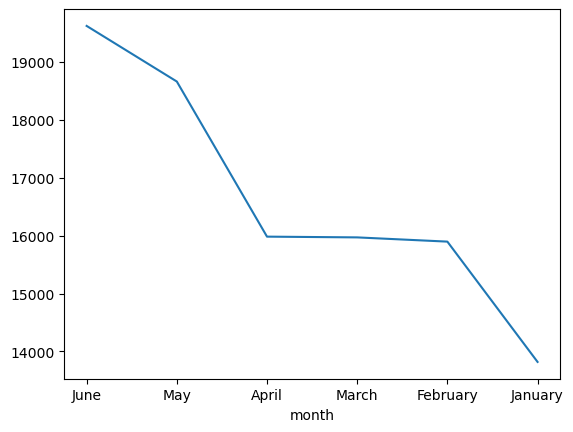

In [95]:
# To display the above visually:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

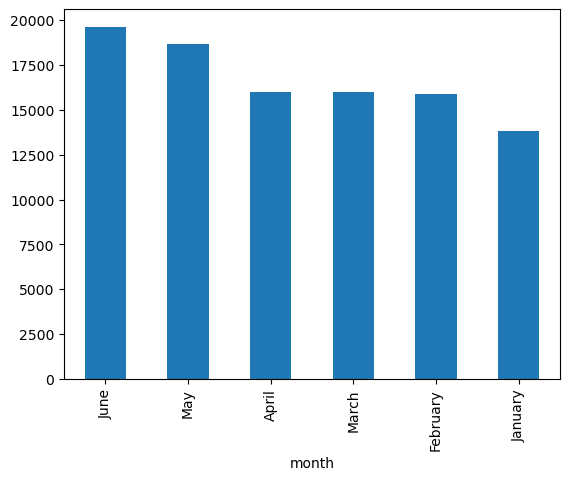

In [97]:
uber_15['month'].value_counts().plot(kind='bar')

In [136]:
#To obtain the day number, day name, hour and minute:

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [138]:
# To display the top 4:

uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,minute,hour
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,43,21
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,52,19
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,26,20
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,38,17


In [142]:
#To display crosstabular / pivot table containing month and weekday:

pd.crosstab(index=uber_15['month'],columns=uber_15['weekday'])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [144]:
#To assign the object 'pivot' to the above function:

pivot = pd.crosstab(index=uber_15['month'],columns=uber_15['weekday'])

In [146]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

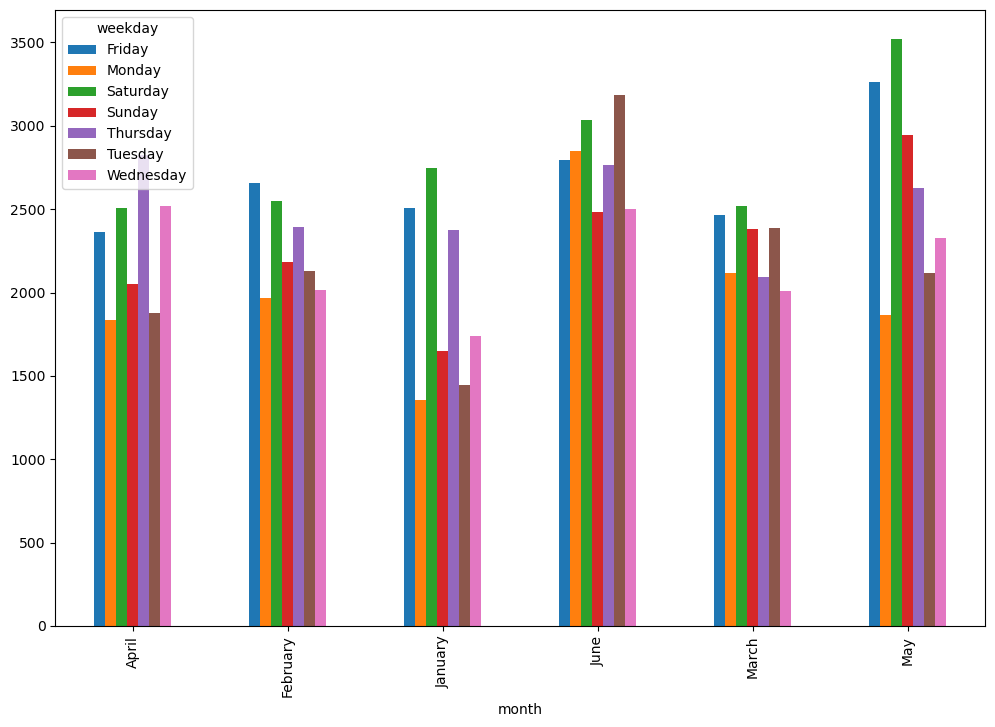

In [162]:
pivot.plot(kind='bar' , figsize=(12,8))

In [168]:
#Find out when rush hour occurs in NYC on all days

#Step 1: find the number of bookings/pickups per hour per day and display this in a dataframe (rows/columns:

summary = uber_15.groupby(['weekday','hour'] , as_index=False).size()


In [170]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

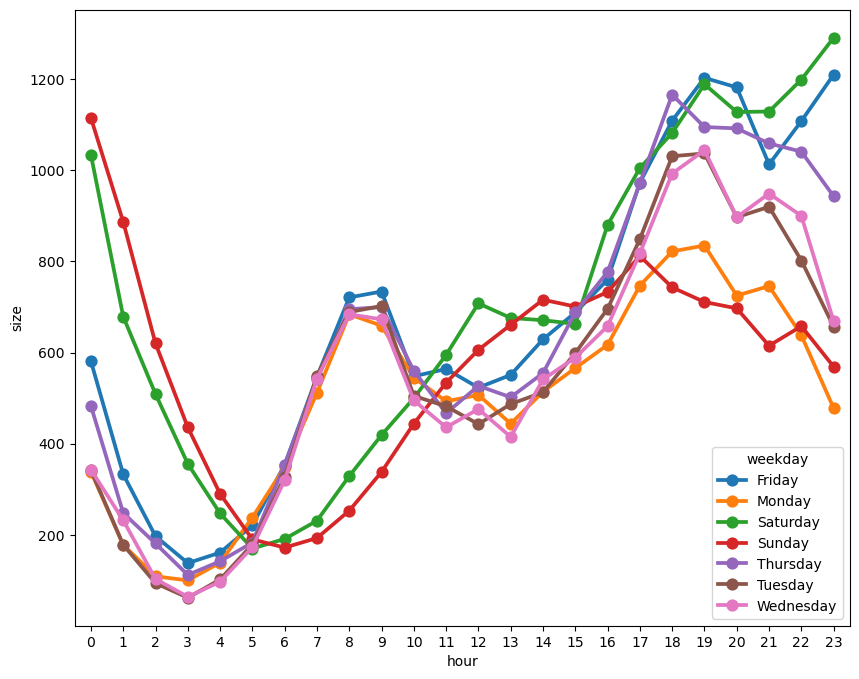

In [186]:
plt.figure(figsize=(10,8))
sns.pointplot(x="hour" , y="size" , hue= "weekday", data=summary)

In [188]:
#Which Uber base-number has the most active vehicles?



,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [190]:
os.listdir(r"/Users/munira/Documents/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [200]:
uber_foil = pd.read_csv(r"/Users/munira/Documents/Datasets/Uber-Jan-Feb-FOIL.csv")

In [202]:
uber_foil.shape

(354, 4)

In [204]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [206]:
!pip install chart_studio
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00


In [209]:
#You need a boxplot for the next part:

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [211]:
init_notebook_mode(connected=True)

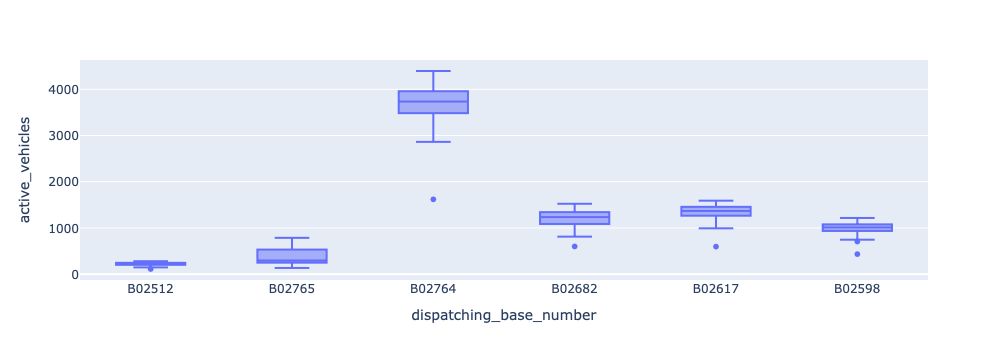

In [215]:
px.box(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

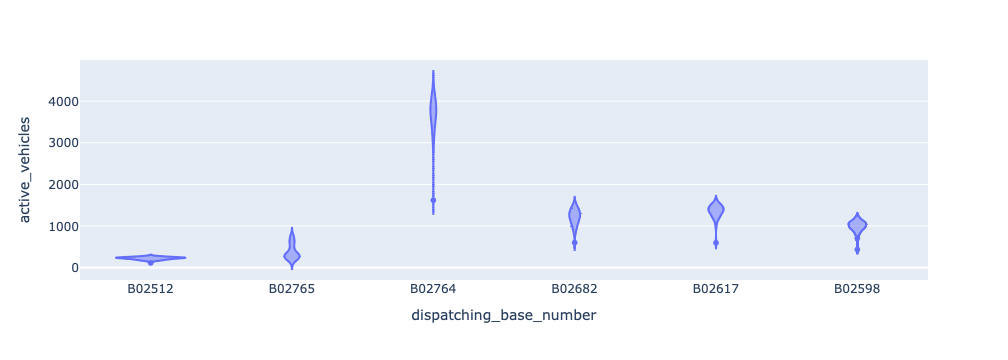

In [217]:
#To show how number of active_vehicles are distributed for each dispatching_base_number:

px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)